# Cars Data Exploration
Review the cars dataset

In [145]:
# import project libraries
from sklearnex import patch_sklearn
patch_sklearn()

import pandas as pd
import numpy as np
from sklearn.feature_extraction import FeatureHasher
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, IsolationForest
import re

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### Collect data 
Read csv file to collect cars data and filter relevant features

In [146]:
# Read CSV file
cars_df = pd.read_csv(r'C:\Users\cesar_0qb0xal\Documents\GitHub\cars_ml_project\data\data_exploration\input\cars.csv')
cars_df

,Unnamed: 0,msrp,year,canonical_mmty,model,local_zone,interior_color,aff_code,price,price_badge,...,mileage,make,bodystyle,cat,vin,canonical_mmt,fuel_type,stock_type,exterior_color,page_channel
0,0,57215.0,2024,Chevrolet:Blazer EV:RS:2024,Blazer EV,NaN,Black,national,54595.0,NaN,...,0.0,Chevrolet,SUV,ev_crossover_midsize,3GNKDCRJ6RS227894,Chevrolet:Blazer EV:RS,Electric,New,Sterling Gray Metallic,shopping
1,1,58845.0,2024,RAM:ProMaster 2500:High Roof:2024,ProMaster 2500,NaN,Black,national,52446.0,NaN,...,0.0,RAM,Cargo Van,van_fullsize,3C6LRVDG0RE118763,RAM:ProMaster 2500:High Roof,Gasoline,New,Bright White Clearcoat,shopping
2,2,58795.0,2024,Mercedes-Benz:Sprinter 2500:High Roof:2024,Sprinter 2500,NaN,NaN,national,54295.0,NaN,...,8.0,Mercedes-Benz,Cargo Van,van_fullsize,W1Y4KCHY8RT178723,Mercedes-Benz:Sprinter 2500:High Roof,Diesel,New,Blue Grey,shopping
3,3,33815.0,2024,Honda:CR-V:EX:2024,CR-V,NaN,Gray,national,NaN,NaN,...,7.0,Honda,SUV,crossover_compact,5J6RS3H44RL004214,Honda:CR-V:EX,Gasoline,New,Radiant Red Metallic,shopping
4,4,27995.0,2024,Chevrolet:Equinox:LS:2024,Equinox,NaN,Medium Ash Gray,national,24803.0,NaN,...,0.0,Chevrolet,SUV,crossover_midsize,3GNAXHEG1RL299011,Chevrolet:Equinox:LS,Gasoline,New,Summit White,shopping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114319,114319,69045.0,2024,Jaguar:F-PACE:P250 R-Dynamic S:2024,F-PACE,NaN,Ebony,national,69045.0,NaN,...,6.0,Jaguar,SUV,luxurysuv_crossover,SADCT2EX2RA731854,Jaguar:F-PACE:P250 R-Dynamic S,Gasoline,New,Fuji White,shopping
114320,114320,0.0,2010,Chevrolet:Camaro:2SS:2010,Camaro,NaN,Gray,national,19143.0,NaN,...,87601.0,Chevrolet,Coupe,coupeconvertible_coupe,2G1FK1EJ8A9134458,Chevrolet:Camaro:2SS,Gasoline,Used,Imperial Blue Metallic,shopping
114321,114321,44135.0,2023,Buick:Envision:Essence AWD:2023,Envision,NaN,Ebony w/Ebony Accents,national,35500.0,NaN,...,1000.0,Buick,SUV,luxurysuv_crossover,LRBFZPR42PD228470,Buick:Envision:Essence AWD,Gasoline,New,Ebony Twilight Metallic,shopping
114322,114322,NaN,2022,Mercedes-Benz:GLS 450:4MATIC:2022,GLS 450,NaN,Macchiato Beige,national,69990.0,NaN,...,35374.0,Mercedes-Benz,SUV,luxurysuv_crossover,4JGFF5KE9NA626237,Mercedes-Benz:GLS 450:4MATIC,Gasoline,Used,MANUFAKTUR Diamond White Bright,shopping


In [147]:
# Filter relevant features
columns_to_drop = ['page_channel', 'canonical_mmt', 'vin', 'dealer_zip', 'dealer_name', 'trim', 'aff_code', 'canonical_mmty', 'Unnamed: 0', 'local_zone', 'price_badge']
cars_df.drop(columns=columns_to_drop, inplace=True)
cars_df

,msrp,year,model,interior_color,price,drivetrain,mileage,make,bodystyle,cat,fuel_type,stock_type,exterior_color
0,57215.0,2024,Blazer EV,Black,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,New,Sterling Gray Metallic
1,58845.0,2024,ProMaster 2500,Black,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,Gasoline,New,Bright White Clearcoat
2,58795.0,2024,Sprinter 2500,NaN,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,New,Blue Grey
3,33815.0,2024,CR-V,Gray,NaN,Front-wheel Drive,7.0,Honda,SUV,crossover_compact,Gasoline,New,Radiant Red Metallic
4,27995.0,2024,Equinox,Medium Ash Gray,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,New,Summit White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114319,69045.0,2024,F-PACE,Ebony,69045.0,All-wheel Drive,6.0,Jaguar,SUV,luxurysuv_crossover,Gasoline,New,Fuji White
114320,0.0,2010,Camaro,Gray,19143.0,Rear-wheel Drive,87601.0,Chevrolet,Coupe,coupeconvertible_coupe,Gasoline,Used,Imperial Blue Metallic
114321,44135.0,2023,Envision,Ebony w/Ebony Accents,35500.0,All-wheel Drive,1000.0,Buick,SUV,luxurysuv_crossover,Gasoline,New,Ebony Twilight Metallic
114322,NaN,2022,GLS 450,Macchiato Beige,69990.0,All-wheel Drive,35374.0,Mercedes-Benz,SUV,luxurysuv_crossover,Gasoline,Used,MANUFAKTUR Diamond White Bright


In [148]:
# Print the dataset shape
cars_df.shape

(114324, 13)

### Clean Data
Remove duplicates in dataset

In [149]:
# Remove duplicates
cars_df.drop_duplicates(inplace=True)
cars_df.shape

(54268, 13)

### Apply Features transformation

#### msrp
manufacturer's suggested retail price. Replace 0 values by NaN, 0 is not a valid price.

In [150]:
# Apply msrp value
def map_msrp(msrp):
    """
    Replace 0 values by null

    :param msrp: manufacturer's suggested retail price
    """
    if msrp == 0:
        return np.nan
    return msrp

In [151]:
# Apply msrp transformation
cars_df['msrp'] = cars_df['msrp'].map(map_msrp)

In [152]:
cars_df['msrp'].skew()

2.8121143104068973

In [153]:
# Check min value
cars_df['msrp'].min()

5895.0

In [154]:
# Check max value
cars_df['msrp'].max()

489716.0

<Axes: >

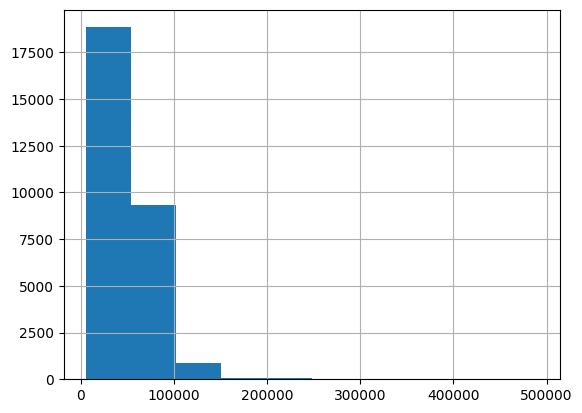

In [155]:
# plot hist
cars_df['msrp'].hist()

#### year
No transformation needed

<Axes: >

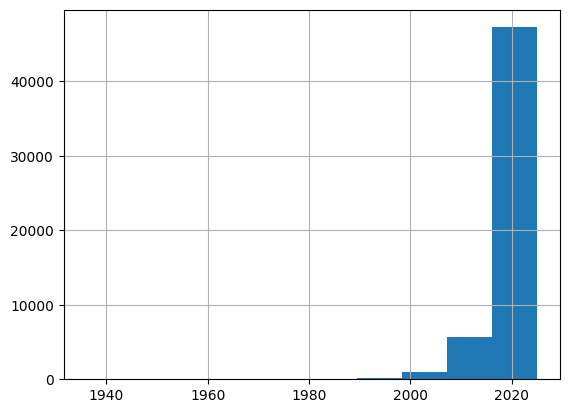

In [156]:
cars_df['year'].hist()

In [157]:
# Check the skew.
# Skew measures the asymmetry of the distribution relative to the normal distribution
cars_df['year'].skew()

-3.6597066795833317

In [158]:
# Check the kurtosis
# Kurtosis describes the height and sharpness of the central peak, relative to that of a standard bell curve
cars_df['year'].kurtosis()

24.810357641022208

In [159]:
cars_df['year'].min()

1936

A transformation is needed to handle the high negative skew and kurtosis, The current values represent the presence of outliers

#### model
Cars model, it's related with the maker

In [160]:
cars_df['model'].value_counts(dropna=False)

model
Escape            939
Grand Cherokee    894
Equinox           849
Outback           812
Tucson            716
                 ... 
850                 1
Portofino M         1
Tribute             1
ELR                 1
Phantom             1
Name: count, Length: 1067, dtype: int64

In [161]:
# Review unique values
len(cars_df['model'].unique())

1067

Apply hash trick to handle the high-cardinality feature.

In [162]:
# Transform the categorical column into a format suitable for FeatureHasher
model_data = cars_df['model'].apply(lambda x: {x: 1}).tolist()

In [163]:
# Define the number of hash space
# By default it's the total number of unique options divided by 5. Check the 'Machine Learning Design patterns' book chapter 1
n_hash = int(len(cars_df['model'].unique())/20) # This values is a hyperparameter
n_hash

53

In [164]:
# Initialize FeatureHasher
hasher = FeatureHasher(n_features=n_hash, input_type='dict')
# Apply FeatureHasher
model_hashed_features = hasher.transform(model_data)
model_hashed_features.shape

(54268, 53)

In [165]:
# Generate model hashed dataframe
model_hashed_df = pd.DataFrame(model_hashed_features.toarray(), columns=[f'model_hashed_{i}' for i in range(model_hashed_features.shape[1])], index=cars_df.index)
model_hashed_df

,model_hashed_0,model_hashed_1,model_hashed_2,model_hashed_3,model_hashed_4,model_hashed_5,model_hashed_6,model_hashed_7,model_hashed_8,model_hashed_9,...,model_hashed_43,model_hashed_44,model_hashed_45,model_hashed_46,model_hashed_47,model_hashed_48,model_hashed_49,model_hashed_50,model_hashed_51,model_hashed_52
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114317,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
114320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0


In [166]:
# Concatenate the dataframes
cars_df = pd.concat([cars_df, model_hashed_df], axis=1)
cars_df

,msrp,year,model,interior_color,price,drivetrain,mileage,make,bodystyle,cat,...,model_hashed_43,model_hashed_44,model_hashed_45,model_hashed_46,model_hashed_47,model_hashed_48,model_hashed_49,model_hashed_50,model_hashed_51,model_hashed_52
0,57215.0,2024,Blazer EV,Black,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,58845.0,2024,ProMaster 2500,Black,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58795.0,2024,Sprinter 2500,NaN,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33815.0,2024,CR-V,Gray,NaN,Front-wheel Drive,7.0,Honda,SUV,crossover_compact,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27995.0,2024,Equinox,Medium Ash Gray,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114316,NaN,2021,X6,Cognac,58990.0,All-wheel Drive,16009.0,BMW,SUV,luxurysuv_crossover,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114317,32255.0,2024,Sonata,Dark Gray,31477.0,Front-wheel Drive,12.0,Hyundai,Sedan,sedan_midsize,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114319,69045.0,2024,F-PACE,Ebony,69045.0,All-wheel Drive,6.0,Jaguar,SUV,luxurysuv_crossover,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
114320,NaN,2010,Camaro,Gray,19143.0,Rear-wheel Drive,87601.0,Chevrolet,Coupe,coupeconvertible_coupe,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0


In [167]:
# Once used drop the model feature
cars_df.drop(columns='model', inplace=True)
cars_df.shape

(54268, 65)

#### exterior_color
The feature has not consistensy. Vocabulary is open. Use and embedding method and clustering method to group them. Like TF-IDF or Word2Vec, and KMeans to group them or let them directly in a vector format.

NOTE: Using neural networks it's possile to improve the performance using an Embedding layer

In [168]:
cars_df['exterior_color'].value_counts(dropna=False)

exterior_color
Black                       3185
White                       1795
Bright White Clearcoat      1328
Gray                        1301
Summit White                1253
                            ... 
Ingot Blue Mica                1
Granite Crystal Metallic       1
Storm Cloud                    1
RAPID RED MET TINTED CC        1
Sea Green                      1
Name: count, Length: 2757, dtype: int64

In [169]:
# Check unique values
len(cars_df['exterior_color'].unique())

2757

Apply lower case and remove special characters to help the vector model

In [170]:
def clean_exterior_color(exterior_color):
    # Check if value is empty
    if pd.isna(exterior_color):
        return 'unknown'
    # Convert interior_color to lower case
    exterior_color = exterior_color.lower()
    # Remove special characters
    exterior_color = re.sub(r'[\W_+w/\/]', ' ', exterior_color)
    # Remove double spaces
    exterior_color = re.sub(r'\s+', ' ', exterior_color)
    # Apply trim 
    exterior_color = exterior_color.strip()
    # Return formated text
    return exterior_color

In [171]:
# Apply lower case and remove special characters
cars_df['exterior_color'] = cars_df['exterior_color'].apply(clean_exterior_color)

In [172]:
cars_df['exterior_color'].value_counts(dropna=False)

exterior_color
black                       3258
hite                        1888
gray                        1356
bright hite clearcoat       1328
summit hite                 1253
                            ... 
ingot blue mica                1
granite crystal metallic       1
storm cloud                    1
rapid red met tinted cc        1
sea green                      1
Name: count, Length: 2666, dtype: int64

In [173]:
# Tokenize colors sentences
tokenized_exterior_color = [simple_preprocess(sentence) for sentence in cars_df['exterior_color'].tolist()]

In [174]:
# Train the Word2Vec model
exterior_color_vector_size = 5 # This is a hyperparameter. #D to keep it user friendly
exterior_color_model = Word2Vec(sentences=tokenized_exterior_color, vector_size=exterior_color_vector_size, window=5, min_count=1, workers=4)

In [175]:
# Calculate the vectors feature avegare
def get_interior_color_phrase_vector(exterior_color_phrase, model):
    exterior_color_words = exterior_color_phrase.split()
    exterior_color_word_vectors = [model.wv[word] for word in exterior_color_words if word in model.wv]
    if not exterior_color_word_vectors:
        print(f"No words found in model for phrase: {exterior_color_phrase}")
        return np.nan
    return sum(exterior_color_word_vectors) / len(exterior_color_word_vectors)


In [176]:
# Calculate the vertor for each interior color
exterior_color_vectors_s = cars_df['exterior_color'].apply(lambda ic: get_interior_color_phrase_vector(ic, exterior_color_model))
exterior_color_vectors_s

No words found in model for phrase: 9561002 9561002
No words found in model for phrase: gb0
No words found in model for phrase: 0085
No words found in model for phrase: 9561002 9561002
No words found in model for phrase: bb2
No words found in model for phrase: 08x5
No words found in model for phrase: silverskymetalli
No words found in model for phrase: 01f7
No words found in model for phrase: 08x8
No words found in model for phrase: 2tblublkroof
No words found in model for phrase: ay2
No words found in model for phrase: 2tredblkroof
No words found in model for phrase: 2tredblkroof
No words found in model for phrase: 2tblublkroof
No words found in model for phrase: 2tredblkroof
No words found in model for phrase: 2tblublkroof
No words found in model for phrase: 2tredblkroof
No words found in model for phrase: 2tblublkroof
No words found in model for phrase: 2tblublkroof
No words found in model for phrase: 0223
No words found in model for phrase: l
No words found in model for phrase: 582

0         [-0.53258127, -0.31265506, 0.68580633, -0.0234...
1         [-1.3627034, 2.69547, 0.106271416, -0.272153, ...
2         [0.006442994, 0.41726732, 1.0349777, -0.954234...
3         [-0.5884823, 1.052501, -0.031285804, 0.1206813...
4         [-0.7198969, 2.2757168, 0.37905377, -0.8125373...
                                ...                        
114316    [0.2620585, 0.4686406, 1.1400048, -0.20459865,...
114317    [-1.301222, 2.2990859, -1.1490554, -0.8979467,...
114319    [-0.6784935, 1.8472912, 0.16078588, -0.7516944...
114320    [0.1294484, 0.050589245, 0.8729174, -0.0857233...
114322    [-0.58196115, 1.9834323, 0.17472762, -0.834538...
Name: exterior_color, Length: 54268, dtype: object

In [177]:
# Replace the nan values with an array of (0,0,0)
base_invalid_value = [0]*exterior_color_vector_size
exterior_color_vectors_s = exterior_color_vectors_s.apply(lambda x: x if isinstance(x, np.ndarray) else base_invalid_value)

In [178]:
# Generate the interior color df using the transformed feature vectors
exterior_color_df = pd.DataFrame(exterior_color_vectors_s.values.tolist(), columns=[f'exterior_color_x{i}' for i in range(len(exterior_color_vectors_s[0]))], index=cars_df.index)
exterior_color_df

,exterior_color_x0,exterior_color_x1,exterior_color_x2,exterior_color_x3,exterior_color_x4
0,-0.532581,-0.312655,0.685806,-0.023407,-1.569723
1,-1.362703,2.695470,0.106271,-0.272153,-0.643695
2,0.006443,0.417267,1.034978,-0.954235,-0.994490
3,-0.588482,1.052501,-0.031286,0.120681,-1.881492
4,-0.719897,2.275717,0.379054,-0.812537,-0.205372
...,...,...,...,...,...
114316,0.262058,0.468641,1.140005,-0.204599,-1.167171
114317,-1.301222,2.299086,-1.149055,-0.897947,-2.669000
114319,-0.678493,1.847291,0.160786,-0.751694,-0.192351
114320,0.129448,0.050589,0.872917,-0.085723,-0.867866


In [179]:
# Concatenate the dataframes
cars_df = pd.concat([cars_df, exterior_color_df], axis=1)
cars_df

,msrp,year,interior_color,price,drivetrain,mileage,make,bodystyle,cat,fuel_type,...,model_hashed_48,model_hashed_49,model_hashed_50,model_hashed_51,model_hashed_52,exterior_color_x0,exterior_color_x1,exterior_color_x2,exterior_color_x3,exterior_color_x4
0,57215.0,2024,Black,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,...,0.0,0.0,0.0,0.0,0.0,-0.532581,-0.312655,0.685806,-0.023407,-1.569723
1,58845.0,2024,Black,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,Gasoline,...,0.0,0.0,0.0,0.0,0.0,-1.362703,2.695470,0.106271,-0.272153,-0.643695
2,58795.0,2024,NaN,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,...,0.0,0.0,0.0,0.0,0.0,0.006443,0.417267,1.034978,-0.954235,-0.994490
3,33815.0,2024,Gray,NaN,Front-wheel Drive,7.0,Honda,SUV,crossover_compact,Gasoline,...,0.0,0.0,0.0,0.0,0.0,-0.588482,1.052501,-0.031286,0.120681,-1.881492
4,27995.0,2024,Medium Ash Gray,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,...,-1.0,0.0,0.0,0.0,0.0,-0.719897,2.275717,0.379054,-0.812537,-0.205372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114316,NaN,2021,Cognac,58990.0,All-wheel Drive,16009.0,BMW,SUV,luxurysuv_crossover,Gasoline,...,0.0,0.0,0.0,0.0,0.0,0.262058,0.468641,1.140005,-0.204599,-1.167171
114317,32255.0,2024,Dark Gray,31477.0,Front-wheel Drive,12.0,Hyundai,Sedan,sedan_midsize,Gasoline,...,0.0,0.0,0.0,0.0,0.0,-1.301222,2.299086,-1.149055,-0.897947,-2.669000
114319,69045.0,2024,Ebony,69045.0,All-wheel Drive,6.0,Jaguar,SUV,luxurysuv_crossover,Gasoline,...,0.0,1.0,0.0,0.0,0.0,-0.678493,1.847291,0.160786,-0.751694,-0.192351
114320,NaN,2010,Gray,19143.0,Rear-wheel Drive,87601.0,Chevrolet,Coupe,coupeconvertible_coupe,Gasoline,...,-1.0,0.0,0.0,0.0,0.0,0.129448,0.050589,0.872917,-0.085723,-0.867866


In [180]:
# NOTE: No longer needed 5D embedding space is used
"""import matplotlib.pyplot as plt

x = cars_df['exterior_color_x0'].values.tolist()
y = cars_df['exterior_color_x1'].values.tolist()
z = cars_df['exterior_color_x2'].values.tolist()
# Labels for each point
labels = cars_df['exterior_color'].values.tolist()"""

"import matplotlib.pyplot as plt\n\nx = cars_df['exterior_color_x0'].values.tolist()\ny = cars_df['exterior_color_x1'].values.tolist()\nz = cars_df['exterior_color_x2'].values.tolist()\n# Labels for each point\nlabels = cars_df['exterior_color'].values.tolist()"

In [181]:
# NOTE: No longer needed 5D embedding space is used

"""# Create a new figure
fig = plt.figure(figsize=(16, 16))

# Add an axes
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, color='b', marker='o')  # You can change the color and marker style

# Label each point
for i, txt in enumerate(labels):
    ax.text(x[i], y[i], z[i], txt, color='red', fontsize=8)  # You can change text color and properties

# Adding labels to the axes
ax.set_xlabel('exterior_color 0')
ax.set_ylabel('exterior_color 1')
ax.set_zlabel('exterior_color 2')

# Show plot
plt.show()"""

"# Create a new figure\nfig = plt.figure(figsize=(16, 16))\n\n# Add an axes\nax = fig.add_subplot(111, projection='3d')\n\n# Scatter plot\nax.scatter(x, y, z, color='b', marker='o')  # You can change the color and marker style\n\n# Label each point\nfor i, txt in enumerate(labels):\n    ax.text(x[i], y[i], z[i], txt, color='red', fontsize=8)  # You can change text color and properties\n\n# Adding labels to the axes\nax.set_xlabel('exterior_color 0')\nax.set_ylabel('exterior_color 1')\nax.set_zlabel('exterior_color 2')\n\n# Show plot\nplt.show()"

In [182]:
# Once used drop the exterior_color feature
cars_df.drop(columns='exterior_color', inplace=True)
cars_df.shape

(54268, 69)

#### interior_color
The feature has not consistensy. Vocabulary is open. Use and embedding method and clustering method to group them. Like TF-IDF or Word2Vec, and KMeans to group them or let them directly in a vector format.

NOTE: Using neural networks it's possile to improve the performance using an Embedding layer

In [183]:
cars_df['interior_color'].value_counts(dropna=False)

interior_color
Black                                  20962
Jet Black                               3665
Gray                                    3410
Ebony                                   3120
NaN                                     2940
                                       ...  
Dark / Light Slate Gray                    1
Blk/Graph Lth                              1
Dark Frost Beige / Medium Frost Bei        1
Truffle / Ivory                            1
Rialto Green                               1
Name: count, Length: 1633, dtype: int64

In [184]:
# Check unique values
len(cars_df['interior_color'].unique())

1633

Apply lower case and remove special characters to help the vector model

In [185]:
def clean_interior_color(interior_color):
    # Check if value is empty
    if pd.isna(interior_color):
        return 'unknown'
    # Convert interior_color to lower case
    interior_color = interior_color.lower()
    # Remove special characters
    interior_color = re.sub(r'[\W_+w/\/]', ' ', interior_color)
    # Remove double spaces
    interior_color = re.sub(r'\s+', ' ', interior_color)
    # Return formated text
    return interior_color

In [186]:
# Apply lower case and remove special characters
cars_df['interior_color'] = cars_df['interior_color'].apply(clean_interior_color)

In [187]:
cars_df['interior_color'].value_counts(dropna=False)

interior_color
black                                21115
jet black                             3668
gray                                  3459
ebony                                 3122
unknown                               2940
                                     ...  
dark frost beige medium frost bei        1
truffle ivory                            1
medium light stone leather               1
graphite black                           1
rialto green                             1
Name: count, Length: 1490, dtype: int64

In [188]:
# Tokenize colors sentences
tokenized_interior_color = [simple_preprocess(sentence) for sentence in cars_df['interior_color'].tolist()]

In [189]:
# Train the Word2Vec model
interior_color_vector_size = 5 # This is a hyperparameter. #D to keep it user friendly
interior_color_model = Word2Vec(sentences=tokenized_interior_color, vector_size=interior_color_vector_size, window=5, min_count=1, workers=4)

In [190]:
# Calculate the vectors feature avegare
def get_interior_color_phrase_vector(interior_color_phrase, model):
    interior_color_words = interior_color_phrase.split()
    interior_color_word_vectors = [model.wv[word] for word in interior_color_words if word in model.wv]
    if not interior_color_word_vectors:
        print(f"No words found in model for phrase: {interior_color_phrase}")
        return np.nan
    return sum(interior_color_word_vectors) / len(interior_color_word_vectors)


In [191]:
# Calculate the vertor for each interior color
interior_color_vectors_s = cars_df['interior_color'].apply(lambda ic: get_interior_color_phrase_vector(ic, interior_color_model))
interior_color_vectors_s

No words found in model for phrase:  e
No words found in model for phrase:  e
No words found in model for phrase: p 
No words found in model for phrase: c 
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: d 
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: b6x7
No words found in model for phrase: 7b
No words found in model for phrase: 7b
No words found in model for phrase: 7b
No words found in model for phrase: glx7
No words found in model for phrase: alx7
No words found in model for phrase: a7x9
No words found in model for phrase: glx7
No words found in model for phrase: b6x7
No words found in model for phrase: d6x7
No words found in model for phrase: b6x7
No words found in model for phra

0         [0.011426709, 0.7470206, 0.67894775, -0.221949...
1         [0.011426709, 0.7470206, 0.67894775, -0.221949...
2         [0.14623532, 0.10140524, 0.13515386, 0.0152573...
3         [0.23241603, 0.62193215, 0.952103, -1.0497136,...
4         [0.5101985, 0.5511202, 0.61081487, -0.97231597...
                                ...                        
114316    [0.18294443, 0.25963855, 0.37574896, -0.548469...
114317    [0.325439, 0.57828045, 1.5659583, -1.0872988, ...
114319    [0.61047643, 0.83787805, 0.87736964, -1.117714...
114320    [0.23241603, 0.62193215, 0.952103, -1.0497136,...
114322    [0.23987062, 0.520704, 0.445104, -0.9913127, -...
Name: interior_color, Length: 54268, dtype: object

In [192]:
# Replace the nan values with an array of (0,0,0)
base_invalid_value = [0]*interior_color_vector_size
interior_color_vectors_s = interior_color_vectors_s.apply(lambda x: x if isinstance(x, np.ndarray) else base_invalid_value)

In [193]:
# Generate the interior color df using the transformed feature vectors
interior_color_df = pd.DataFrame(interior_color_vectors_s.values.tolist(), columns=[f'interior_color_x{i}' for i in range(len(interior_color_vectors_s[0]))], index=cars_df.index)
interior_color_df

,interior_color_x0,interior_color_x1,interior_color_x2,interior_color_x3,interior_color_x4
0,0.011427,0.747021,0.678948,-0.221949,-0.645838
1,0.011427,0.747021,0.678948,-0.221949,-0.645838
2,0.146235,0.101405,0.135154,0.015257,0.127018
3,0.232416,0.621932,0.952103,-1.049714,0.498647
4,0.510198,0.551120,0.610815,-0.972316,0.773155
...,...,...,...,...,...
114316,0.182944,0.259639,0.375749,-0.548469,0.127046
114317,0.325439,0.578280,1.565958,-1.087299,1.128178
114319,0.610476,0.837878,0.877370,-1.117714,-0.518865
114320,0.232416,0.621932,0.952103,-1.049714,0.498647


In [194]:
# Concatenate the dataframes
cars_df = pd.concat([cars_df, interior_color_df], axis=1)
cars_df

,msrp,year,interior_color,price,drivetrain,mileage,make,bodystyle,cat,fuel_type,...,exterior_color_x0,exterior_color_x1,exterior_color_x2,exterior_color_x3,exterior_color_x4,interior_color_x0,interior_color_x1,interior_color_x2,interior_color_x3,interior_color_x4
0,57215.0,2024,black,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,...,-0.532581,-0.312655,0.685806,-0.023407,-1.569723,0.011427,0.747021,0.678948,-0.221949,-0.645838
1,58845.0,2024,black,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,Gasoline,...,-1.362703,2.695470,0.106271,-0.272153,-0.643695,0.011427,0.747021,0.678948,-0.221949,-0.645838
2,58795.0,2024,unknown,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,...,0.006443,0.417267,1.034978,-0.954235,-0.994490,0.146235,0.101405,0.135154,0.015257,0.127018
3,33815.0,2024,gray,NaN,Front-wheel Drive,7.0,Honda,SUV,crossover_compact,Gasoline,...,-0.588482,1.052501,-0.031286,0.120681,-1.881492,0.232416,0.621932,0.952103,-1.049714,0.498647
4,27995.0,2024,medium ash gray,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,...,-0.719897,2.275717,0.379054,-0.812537,-0.205372,0.510198,0.551120,0.610815,-0.972316,0.773155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114316,NaN,2021,cognac,58990.0,All-wheel Drive,16009.0,BMW,SUV,luxurysuv_crossover,Gasoline,...,0.262058,0.468641,1.140005,-0.204599,-1.167171,0.182944,0.259639,0.375749,-0.548469,0.127046
114317,32255.0,2024,dark gray,31477.0,Front-wheel Drive,12.0,Hyundai,Sedan,sedan_midsize,Gasoline,...,-1.301222,2.299086,-1.149055,-0.897947,-2.669000,0.325439,0.578280,1.565958,-1.087299,1.128178
114319,69045.0,2024,ebony,69045.0,All-wheel Drive,6.0,Jaguar,SUV,luxurysuv_crossover,Gasoline,...,-0.678493,1.847291,0.160786,-0.751694,-0.192351,0.610476,0.837878,0.877370,-1.117714,-0.518865
114320,NaN,2010,gray,19143.0,Rear-wheel Drive,87601.0,Chevrolet,Coupe,coupeconvertible_coupe,Gasoline,...,0.129448,0.050589,0.872917,-0.085723,-0.867866,0.232416,0.621932,0.952103,-1.049714,0.498647


Plot a 3D chart to see the color relations

In [195]:
# NOTE: No longer needed 5D embedding space is used
"""import matplotlib.pyplot as plt

x = cars_df['interior_color_x0'].values.tolist()
y = cars_df['interior_color_x1'].values.tolist()
z = cars_df['interior_color_x2'].values.tolist()
# Labels for each point
labels = cars_df['interior_color'].values.tolist()"""

"import matplotlib.pyplot as plt\n\nx = cars_df['interior_color_x0'].values.tolist()\ny = cars_df['interior_color_x1'].values.tolist()\nz = cars_df['interior_color_x2'].values.tolist()\n# Labels for each point\nlabels = cars_df['interior_color'].values.tolist()"

In [196]:
# NOTE: No longer needed 5D embedding space is used
"""# Create a new figure
fig = plt.figure(figsize=(16, 16))

# Add an axes
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, color='b', marker='o')  # You can change the color and marker style

# Label each point
for i, txt in enumerate(labels):
    ax.text(x[i], y[i], z[i], txt, color='red', fontsize=8)  # You can change text color and properties

# Adding labels to the axes
ax.set_xlabel('interior_color 0')
ax.set_ylabel('interior_color 1')
ax.set_zlabel('interior_color 2')

# Show plot
plt.show()"""

"# Create a new figure\nfig = plt.figure(figsize=(16, 16))\n\n# Add an axes\nax = fig.add_subplot(111, projection='3d')\n\n# Scatter plot\nax.scatter(x, y, z, color='b', marker='o')  # You can change the color and marker style\n\n# Label each point\nfor i, txt in enumerate(labels):\n    ax.text(x[i], y[i], z[i], txt, color='red', fontsize=8)  # You can change text color and properties\n\n# Adding labels to the axes\nax.set_xlabel('interior_color 0')\nax.set_ylabel('interior_color 1')\nax.set_zlabel('interior_color 2')\n\n# Show plot\nplt.show()"

In [197]:
# Once used drop the interior_color feature
cars_df.drop(columns='interior_color', inplace=True)
cars_df.shape

(54268, 73)

For now the interior color vertor will be used. None clustering method is applied.

#### price
Numerical and our target. Use a threshold to revome invalid prices

In [198]:
# Check price values
cars_df['price'].value_counts(dropna=False)

price
NaN        540
17995.0    118
16995.0    111
14995.0    102
9995.0      96
          ... 
27879.0      1
54109.0      1
19390.0      1
22262.0      1
19143.0      1
Name: count, Length: 22909, dtype: int64

In [199]:
# Remove missing values
cars_df = cars_df.loc[~cars_df['price'].isna()]
cars_df.shape

(53728, 73)

In [200]:
# Remove the values below the threshold defined
price_threshold = 1500
cars_df = cars_df.loc[cars_df['price']>=price_threshold]
cars_df.shape

(53710, 73)

In [201]:
# Show min price
cars_df['price'].min()

1500.0

In [202]:
# Show max price
cars_df['price'].max()

449953995.0

<Axes: >

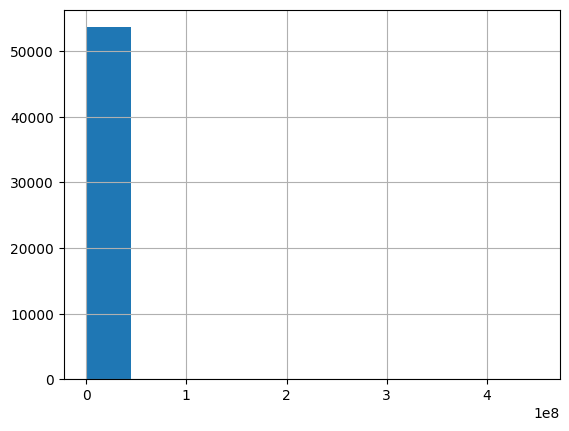

In [203]:
cars_df['price'].hist()

In [204]:
cars_df['price'].skew()

231.65280000882584

In [205]:
cars_df.reset_index(drop=True, inplace=True)
cars_df

,msrp,year,price,drivetrain,mileage,make,bodystyle,cat,fuel_type,stock_type,...,exterior_color_x0,exterior_color_x1,exterior_color_x2,exterior_color_x3,exterior_color_x4,interior_color_x0,interior_color_x1,interior_color_x2,interior_color_x3,interior_color_x4
0,57215.0,2024,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,New,...,-0.532581,-0.312655,0.685806,-0.023407,-1.569723,0.011427,0.747021,0.678948,-0.221949,-0.645838
1,58845.0,2024,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,Gasoline,New,...,-1.362703,2.695470,0.106271,-0.272153,-0.643695,0.011427,0.747021,0.678948,-0.221949,-0.645838
2,58795.0,2024,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,New,...,0.006443,0.417267,1.034978,-0.954235,-0.994490,0.146235,0.101405,0.135154,0.015257,0.127018
3,27995.0,2024,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,New,...,-0.719897,2.275717,0.379054,-0.812537,-0.205372,0.510198,0.551120,0.610815,-0.972316,0.773155
4,83630.0,2024,83630.0,All-wheel Drive,20.0,Audi,SUV,ev_crossover_midsize,Electric,New,...,-0.648200,1.163772,0.598794,-0.325468,-0.475041,0.061626,0.831187,0.214097,-0.828962,-0.302697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53705,NaN,2021,58990.0,All-wheel Drive,16009.0,BMW,SUV,luxurysuv_crossover,Gasoline,Used,...,0.262058,0.468641,1.140005,-0.204599,-1.167171,0.182944,0.259639,0.375749,-0.548469,0.127046
53706,32255.0,2024,31477.0,Front-wheel Drive,12.0,Hyundai,Sedan,sedan_midsize,Gasoline,New,...,-1.301222,2.299086,-1.149055,-0.897947,-2.669000,0.325439,0.578280,1.565958,-1.087299,1.128178
53707,69045.0,2024,69045.0,All-wheel Drive,6.0,Jaguar,SUV,luxurysuv_crossover,Gasoline,New,...,-0.678493,1.847291,0.160786,-0.751694,-0.192351,0.610476,0.837878,0.877370,-1.117714,-0.518865
53708,NaN,2010,19143.0,Rear-wheel Drive,87601.0,Chevrolet,Coupe,coupeconvertible_coupe,Gasoline,Used,...,0.129448,0.050589,0.872917,-0.085723,-0.867866,0.232416,0.621932,0.952103,-1.049714,0.498647


Price has high skew, review methods to remove outliers

#### drivetrain
Close Vocabulary. group them by category

In [206]:
cars_df['drivetrain'].value_counts(dropna=False)

drivetrain
All-wheel Drive                                               25792
Front-wheel Drive                                             10853
Four-wheel Drive                                              10272
Rear-wheel Drive                                               4338
AWD                                                            1329
FWD                                                             445
4WD                                                             290
NaN                                                             242
RWD                                                              88
Unknown                                                          55
4x2                                                               1
Four Wheel Drive                                                  1
All-Wheel Drive with Locking and Limited-Slip Differential        1
All-Wheel Drive                                                   1
Front Wheel Drive                    

In [207]:
def map_drivetrain(drivetrain):
    """
    Group the drive trian by categories

    :param drivetrain: Car drive train

    :return: Grouped drive train
    """
    if pd.isna(drivetrain):
        return np.nan
    
    match drivetrain:
        case 'All-wheel Drive' | 'Four-wheel Drive' | 'AWD' | '4WD' | '4x2' | 'Four Wheel Drive' | 'All-Wheel Drive with Locking and Limited-Slip Differential' | 'All-Wheel Drive' | '4MATIC':
            return 'All-wheel Drive'
        case 'Rear-wheel Drive' | 'RWD':
            return 'Rear-wheel Drive'
        case 'Front-wheel Drive' | 'FWD' | 'Front Wheel Drive':
            return 'Front-wheel Drive'
        case 'Unknown':
            return np.nan
        case _:
            raise Exception(f"No expected drive train: {drivetrain}")
        

In [208]:
# Applt drive train transformation
cars_df['drivetrain'] = cars_df['drivetrain'].map(map_drivetrain)

In [209]:
cars_df['drivetrain'].value_counts(dropna=False)

drivetrain
All-wheel Drive      37688
Front-wheel Drive    11299
Rear-wheel Drive      4426
NaN                    297
Name: count, dtype: int64

Before apply one hot encoding. Make sure the missing values where properly handled

NOTE: In this version we will remove them because they are few, but other techniques can be applied

In [210]:
# Filter the missing values in 'drivetrain'
cars_df = cars_df.loc[~cars_df['drivetrain'].isna()]
cars_df.reset_index(drop=True, inplace=True)
cars_df.shape

(53413, 73)

Apply One-hot encodding to transform drivetrain

In [211]:
# Initialize the OneHotEncoder drivetrain
drivetrain_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit and transform the data
drivetrain_encoded_data = drivetrain_encoder.fit_transform(cars_df[['drivetrain']])
drivetrain_encoded_data

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [212]:
# Convert the drivetrain encoded data into a DataFrame
drivetrain_encoded_df = pd.DataFrame(drivetrain_encoded_data, columns=drivetrain_encoder.get_feature_names_out(['drivetrain']), index=cars_df.index)
drivetrain_encoded_df

,drivetrain_All-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
53408,1.0,0.0,0.0
53409,0.0,1.0,0.0
53410,1.0,0.0,0.0
53411,0.0,0.0,1.0


In [213]:
# Concatenate the original DataFrame with the drivetrain encoded DataFrame
cars_df = pd.concat([cars_df, drivetrain_encoded_df], axis=1)
cars_df

,msrp,year,price,drivetrain,mileage,make,bodystyle,cat,fuel_type,stock_type,...,exterior_color_x3,exterior_color_x4,interior_color_x0,interior_color_x1,interior_color_x2,interior_color_x3,interior_color_x4,drivetrain_All-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
0,57215.0,2024,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,New,...,-0.023407,-1.569723,0.011427,0.747021,0.678948,-0.221949,-0.645838,1.0,0.0,0.0
1,58845.0,2024,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,Gasoline,New,...,-0.272153,-0.643695,0.011427,0.747021,0.678948,-0.221949,-0.645838,0.0,1.0,0.0
2,58795.0,2024,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,New,...,-0.954235,-0.994490,0.146235,0.101405,0.135154,0.015257,0.127018,0.0,0.0,1.0
3,27995.0,2024,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,New,...,-0.812537,-0.205372,0.510198,0.551120,0.610815,-0.972316,0.773155,0.0,1.0,0.0
4,83630.0,2024,83630.0,All-wheel Drive,20.0,Audi,SUV,ev_crossover_midsize,Electric,New,...,-0.325468,-0.475041,0.061626,0.831187,0.214097,-0.828962,-0.302697,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53408,NaN,2021,58990.0,All-wheel Drive,16009.0,BMW,SUV,luxurysuv_crossover,Gasoline,Used,...,-0.204599,-1.167171,0.182944,0.259639,0.375749,-0.548469,0.127046,1.0,0.0,0.0
53409,32255.0,2024,31477.0,Front-wheel Drive,12.0,Hyundai,Sedan,sedan_midsize,Gasoline,New,...,-0.897947,-2.669000,0.325439,0.578280,1.565958,-1.087299,1.128178,0.0,1.0,0.0
53410,69045.0,2024,69045.0,All-wheel Drive,6.0,Jaguar,SUV,luxurysuv_crossover,Gasoline,New,...,-0.751694,-0.192351,0.610476,0.837878,0.877370,-1.117714,-0.518865,1.0,0.0,0.0
53411,NaN,2010,19143.0,Rear-wheel Drive,87601.0,Chevrolet,Coupe,coupeconvertible_coupe,Gasoline,Used,...,-0.085723,-0.867866,0.232416,0.621932,0.952103,-1.049714,0.498647,0.0,0.0,1.0


In [214]:
# Once used drop the interior_color feature
cars_df.drop(columns='drivetrain', inplace=True)
cars_df.shape

(53413, 75)

#### mileage
No transformation needed

<Axes: >

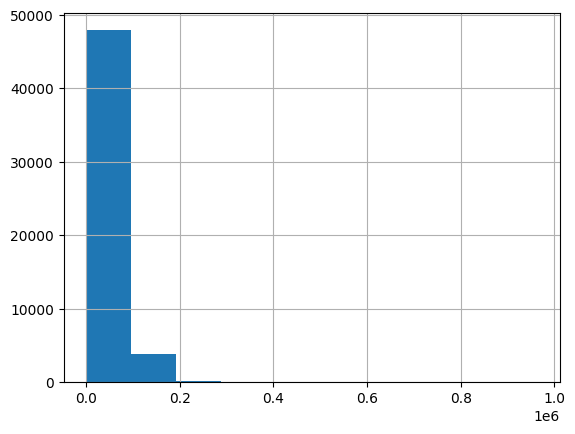

In [215]:
cars_df['mileage'].hist()

In [216]:
cars_df['mileage'].min()

0.0

In [217]:
cars_df['mileage'].max()

962839.0

There are some outliers, feature has a high skew

#### make
Make feature has a semi-close vocabulary. We can use a pretrained model like Word2Vec or One-Hot encoding, this last one can generate the Curse Dimensinality and sparcity.

In [218]:
len(cars_df['make'].unique())

60

In [219]:
cars_df['make'].value_counts(dropna=False)

make
Ford             4965
Chevrolet        4818
Jeep             3585
Mercedes-Benz    3327
Nissan           3100
Hyundai          3062
BMW              2750
Volkswagen       2715
Honda            2148
Subaru           2044
Toyota           2034
Audi             1786
Mazda            1599
Kia              1518
Cadillac         1463
RAM              1376
Dodge            1375
Lexus            1233
GMC              1139
Acura            1036
Lincoln           850
INFINITI          714
Buick             655
Land Rover        578
Volvo             556
Porsche           438
Chrysler          362
Tesla             328
Alfa Romeo        254
Jaguar            233
Maserati          179
Genesis           164
Mitsubishi        158
MINI              111
Ferrari           111
Bentley            98
Rolls-Royce        85
Rivian             62
Pontiac            57
Aston Martin       57
Lamborghini        52
Scion              50
FIAT               37
Hummer             29
McLaren            25
Mercu

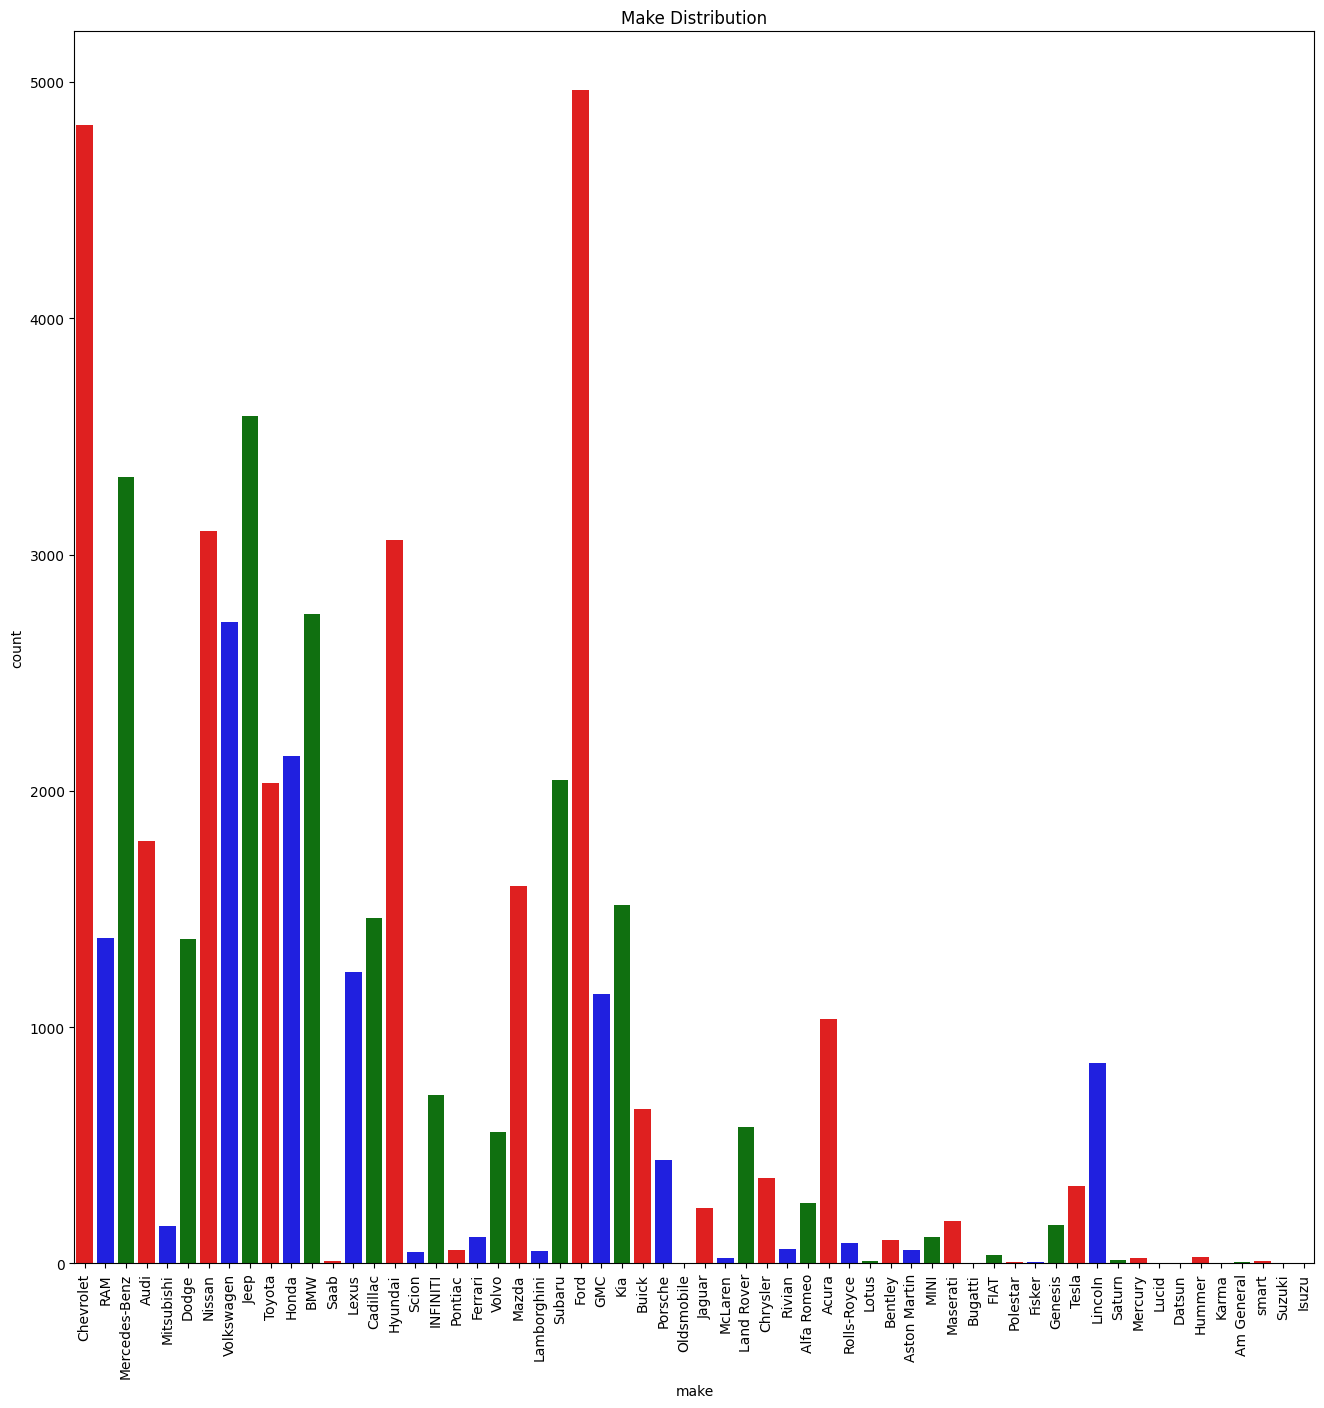

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the figure size
plt.figure(figsize=(16, 16))
ax = sns.countplot(x='make', data=cars_df, palette=['red', 'blue', 'green'])
plt.title('Make Distribution')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.show()

Apply One-Hot encoding. To reduce the unbalanced factor, remove the instances where the categories frecuency is under a defined threshold until they have enough data to participate in the model. 

The threshold value is added also to avoid remove a category when outlier removal is applied

NOTE: use regularization methods (L1, L2) to train the model, and regression algorithms able to handle unbalanced features like tress-desitions based models. Additionally if needed set the model categories weights to focus on the cases with lower frecuency.

In [221]:
# Define the threshold for category frequency
make_fecuency_threshold = 300
# Compute the frequency of each category
make_category_counts = cars_df['make'].value_counts()
# Identify categories that exceed the threshold
make_categories_to_remove = make_category_counts[make_category_counts > make_fecuency_threshold].index
# Filter the DataFrame to exclude rows with these categories
cars_df = cars_df[cars_df['make'].isin(make_categories_to_remove)]
make_categories_to_remove # NOTE: Add a filter in the inference model to skip invalid cars make

Index(['Ford', 'Chevrolet', 'Jeep', 'Mercedes-Benz', 'Nissan', 'Hyundai',
       'BMW', 'Volkswagen', 'Honda', 'Subaru', 'Toyota', 'Audi', 'Mazda',
       'Kia', 'Cadillac', 'RAM', 'Dodge', 'Lexus', 'GMC', 'Acura', 'Lincoln',
       'INFINITI', 'Buick', 'Land Rover', 'Volvo', 'Porsche', 'Chrysler',
       'Tesla'],
      dtype='object', name='make')

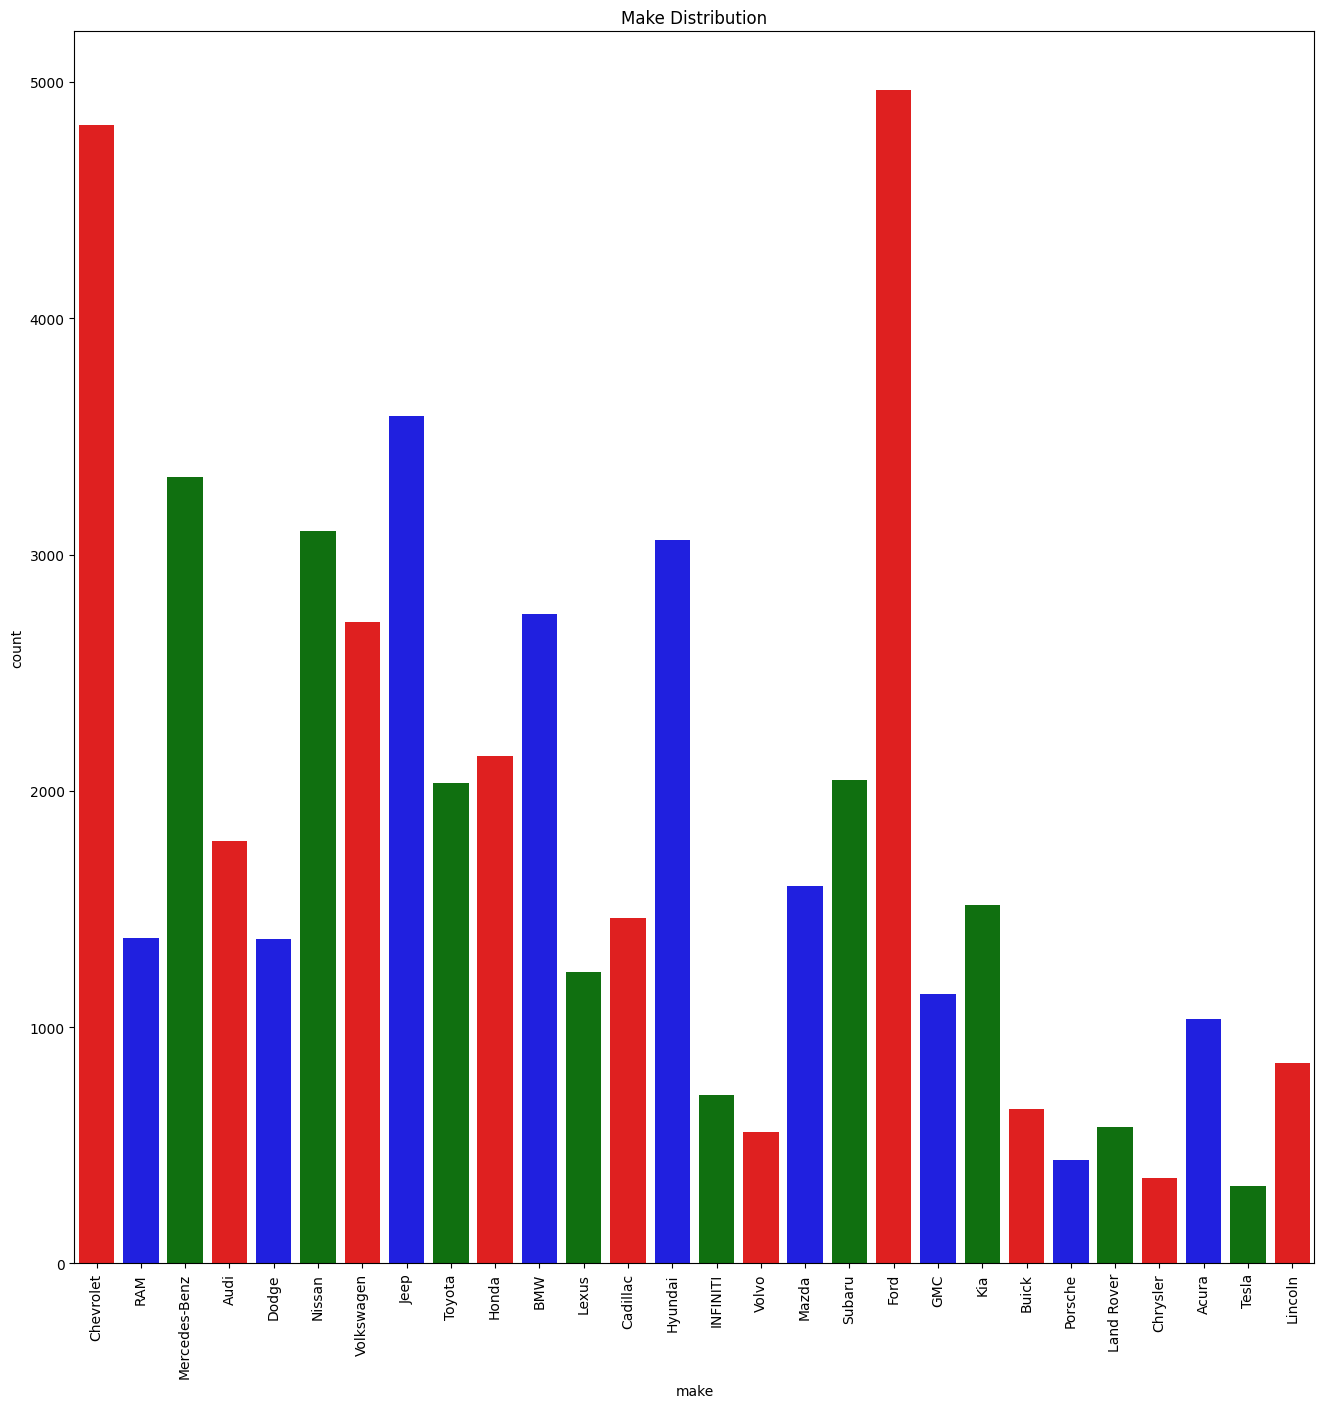

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the figure size
plt.figure(figsize=(16, 16))
ax = sns.countplot(x='make', data=cars_df, palette=['red', 'blue', 'green'])
plt.title('Make Distribution')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.show()

In [223]:
# Initialize the OneHotEncoder maker
make_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit and transform the data
make_encoded_data = make_encoder.fit_transform(cars_df[['make']])

In [224]:
# Convert the drivetrain encoded data into a DataFrame
make_encoded_df = pd.DataFrame(make_encoded_data, columns=make_encoder.get_feature_names_out(['make']), index=cars_df.index)
make_encoded_df

,make_Acura,make_Audi,make_BMW,make_Buick,make_Cadillac,make_Chevrolet,make_Chrysler,make_Dodge,make_Ford,make_GMC,...,make_Mazda,make_Mercedes-Benz,make_Nissan,make_Porsche,make_RAM,make_Subaru,make_Tesla,make_Toyota,make_Volkswagen,make_Volvo
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53408,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53411,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [225]:
# Concatenate the original DataFrame with the drivetrain encoded DataFrame
cars_df = pd.concat([cars_df, make_encoded_df], axis=1)
cars_df

,msrp,year,price,mileage,make,bodystyle,cat,fuel_type,stock_type,model_hashed_0,...,make_Mazda,make_Mercedes-Benz,make_Nissan,make_Porsche,make_RAM,make_Subaru,make_Tesla,make_Toyota,make_Volkswagen,make_Volvo
0,57215.0,2024,54595.0,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,58845.0,2024,52446.0,0.0,RAM,Cargo Van,van_fullsize,Gasoline,New,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,58795.0,2024,54295.0,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,New,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27995.0,2024,24803.0,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,83630.0,2024,83630.0,20.0,Audi,SUV,ev_crossover_midsize,Electric,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53407,NaN,2014,18973.0,134974.0,Jeep,SUV,suv_midsize,Gasoline,Used,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53408,NaN,2021,58990.0,16009.0,BMW,SUV,luxurysuv_crossover,Gasoline,Used,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53409,32255.0,2024,31477.0,12.0,Hyundai,Sedan,sedan_midsize,Gasoline,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53411,NaN,2010,19143.0,87601.0,Chevrolet,Coupe,coupeconvertible_coupe,Gasoline,Used,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [226]:
# Once used drop the make feature
cars_df.drop(columns='make', inplace=True)
cars_df.shape

(51554, 102)

#### bodystyle
It seems a close vocabulaty (low cardinality). It's possible to apply one-hot encoding.

In [227]:
cars_df['bodystyle'].value_counts(dropna=False)

bodystyle
SUV              31377
Sedan             8885
Pickup Truck      4571
Coupe             1618
Hatchback         1574
Cargo Van         1333
Convertible        908
Passenger Van      598
Wagon              335
NaN                180
Minivan            175
Name: count, dtype: int64

NOTE: There are some features values with unbalanced. Check it in depth in the meeting

And how should handle the inputation in Categorical features with mising values? 

Apply one-hot encodding

In [228]:
# Initialize the OneHotEncoder bodystyle
bodystyle_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit and transform the data
bodystyle_encoded_data = bodystyle_encoder.fit_transform(cars_df[['bodystyle']])

In [229]:
# Convert the drivetrain encoded data into a DataFrame
bodystyle_encoded_df = pd.DataFrame(bodystyle_encoded_data, columns=bodystyle_encoder.get_feature_names_out(['bodystyle']), index=cars_df.index)
bodystyle_encoded_df

,bodystyle_Cargo Van,bodystyle_Convertible,bodystyle_Coupe,bodystyle_Hatchback,bodystyle_Minivan,bodystyle_Passenger Van,bodystyle_Pickup Truck,bodystyle_SUV,bodystyle_Sedan,bodystyle_Wagon,bodystyle_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
53407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
53408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
53409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
53411,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:
# Concatenate the original DataFrame with the drivetrain encoded DataFrame
cars_df = pd.concat([cars_df, bodystyle_encoded_df], axis=1)
cars_df

,msrp,year,price,mileage,bodystyle,cat,fuel_type,stock_type,model_hashed_0,model_hashed_1,...,bodystyle_Convertible,bodystyle_Coupe,bodystyle_Hatchback,bodystyle_Minivan,bodystyle_Passenger Van,bodystyle_Pickup Truck,bodystyle_SUV,bodystyle_Sedan,bodystyle_Wagon,bodystyle_nan
0,57215.0,2024,54595.0,0.0,SUV,ev_crossover_midsize,Electric,New,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,58845.0,2024,52446.0,0.0,Cargo Van,van_fullsize,Gasoline,New,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58795.0,2024,54295.0,8.0,Cargo Van,van_fullsize,Diesel,New,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27995.0,2024,24803.0,0.0,SUV,crossover_midsize,Gasoline,New,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,83630.0,2024,83630.0,20.0,SUV,ev_crossover_midsize,Electric,New,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53407,NaN,2014,18973.0,134974.0,SUV,suv_midsize,Gasoline,Used,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
53408,NaN,2021,58990.0,16009.0,SUV,luxurysuv_crossover,Gasoline,Used,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
53409,32255.0,2024,31477.0,12.0,Sedan,sedan_midsize,Gasoline,New,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
53411,NaN,2010,19143.0,87601.0,Coupe,coupeconvertible_coupe,Gasoline,Used,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [231]:
# Once used drop the interior_color feature
cars_df.drop(columns='bodystyle', inplace=True)
cars_df.shape

(51554, 112)

#### cat
We can apply TF-IDF to cluster them in categories after split the text by '_'

In [232]:
cars_df['cat'].value_counts(dropna=False)

cat
crossover_compact               9862
luxurysuv_crossover             6684
crossover_midsize               5011
suv_midsize                     4105
truck_fullsize                  3278
sedan_compact                   2658
luxurypassenger_standard        2375
sedan_midsize                   2246
luxurypassenger_plus            1685
hybrid_suv                      1666
van_fullsize                    1584
luxurysuv_suv                   1242
suv_fullsize                    1225
truck_compact                   1179
coupeconvertible_coupe           882
van_mini                         645
coupeconvertible_coupesport      612
hybrid_passenger                 584
ev_luxurysuv_suv                 488
wagonhatchback_hatchback         455
ev_suv_midsize                   448
ev_luxurypassenger_standard      432
ev_crossover_midsize             339
coupeconvertible_convertible     334
NaN                              302
sedan_fullsize                   247
wagonhatchback_wagon             2

In [233]:
cars_df['cat'].unique()

array(['ev_crossover_midsize', 'van_fullsize', 'crossover_midsize',
       'hybrid_suv', 'crossover_compact', 'suv_midsize',
       'coupeconvertible_convertible', 'suv_fullsize', 'sedan_compact',
       'hybrid_passenger', 'luxurypassenger_plus', 'luxurysuv_crossover',
       'sedan_midsize', 'wagonhatchback_hatchback',
       'ev_wagonhatchback_hatchback', 'luxurysuv_suv',
       'luxurypassenger_standard', 'coupeconvertible_coupesport',
       'coupeconvertible_coupe', nan, 'wagonhatchback_wagon',
       'truck_fullsize', 'ev_luxurysuv_suv', 'van_mini',
       'ev_suv_fullsize', 'ev_suv_midsize', 'ev_luxurypassenger_standard',
       'luxurypassenger_ultra', 'sportscar_standard', 'truck_compact',
       'sedan_fullsize', 'ev_sedan_compact', 'ev_wagonhatchback_wagon',
       'ev_luxurypassenger_plus', 'ev_crossover_compact',
       'ev_sedan_midsize', 'ev_truck_fullsize', 'ev_van_fullsize'],
      dtype=object)

Apply Word2Vector embedding trnasformation

In [234]:
def clean_cat(cat):
    # Check if value is empty
    if pd.isna(cat):
        return 'unknown'
    # Convert cat to lower case
    cat = cat.lower()
    # Split by '_' and join again by ' '
    cat = ' '.join(cat.split('_'))
    # Remove double spaces
    cat = re.sub(r'\s+', ' ', cat)
    # Return formated text
    return cat

In [235]:
# Apply lower case and remove special characters
cars_df['cat'] = cars_df['cat'].apply(clean_cat)

In [236]:
cars_df['cat'].value_counts(dropna=False)

cat
crossover compact               9862
luxurysuv crossover             6684
crossover midsize               5011
suv midsize                     4105
truck fullsize                  3278
sedan compact                   2658
luxurypassenger standard        2375
sedan midsize                   2246
luxurypassenger plus            1685
hybrid suv                      1666
van fullsize                    1584
luxurysuv suv                   1242
suv fullsize                    1225
truck compact                   1179
coupeconvertible coupe           882
van mini                         645
coupeconvertible coupesport      612
hybrid passenger                 584
ev luxurysuv suv                 488
wagonhatchback hatchback         455
ev suv midsize                   448
ev luxurypassenger standard      432
ev crossover midsize             339
coupeconvertible convertible     334
unknown                          302
sedan fullsize                   247
wagonhatchback wagon             2

In [237]:
# Tokenize colors sentences
tokenized_cat = [simple_preprocess(sentence) for sentence in cars_df['cat'].tolist()]

In [238]:
# Train the Word2Vec model
cat_vector_size = 3 # This is a hyperparameter. #D to keep it user friendly
cat_model = Word2Vec(sentences=tokenized_cat, vector_size=cat_vector_size, window=5, min_count=1, workers=4)

In [239]:
# Calculate the vectors feature avegare
def get_cat_phrase_vector(cat_phrase, model):
    cat_words = cat_phrase.split()
    cat_word_vectors = [model.wv[word] for word in cat_words if word in model.wv]
    if not cat_word_vectors:
        print(f"No words found in model for phrase: {cat_phrase}")
        return np.nan
    return sum(cat_word_vectors) / len(cat_word_vectors)


In [240]:
# Calculate the vertor for each cat
cat_vectors_s = cars_df['cat'].apply(lambda ic: get_cat_phrase_vector(ic, cat_model))
cat_vectors_s

0           [-0.75326675, -0.2993759, 0.71658427]
1              [0.4180229, -0.75462955, 1.549058]
2              [0.4180229, -0.75462955, 1.549058]
3            [-0.82869816, -0.30824032, 0.774414]
4           [-0.75326675, -0.2993759, 0.71658427]
                           ...                   
53407       [-0.15277155, -0.44962895, 0.7616705]
53408        [-0.63842744, -0.44968417, 0.758837]
53409      [-0.65671206, -0.43466657, 0.62667704]
53411    [-0.2919862, -0.14639418, -0.0011699995]
53412        [-0.63842744, -0.44968417, 0.758837]
Name: cat, Length: 51554, dtype: object

In [241]:
# Replace the nan values with an array of (0,0,0)
base_invalid_value = [0]*cat_vector_size
cat_vectors_s = cat_vectors_s.apply(lambda x: x if isinstance(x, np.ndarray) else base_invalid_value)

In [242]:
# Generate the interior color df using the transformed feature vectors
cat_df = pd.DataFrame(cat_vectors_s.values.tolist(), columns=[f'cat_x{i}' for i in range(len(cat_vectors_s[0]))], index=cars_df.index)
cat_df

,cat_x0,cat_x1,cat_x2
0,-0.753267,-0.299376,0.716584
1,0.418023,-0.754630,1.549058
2,0.418023,-0.754630,1.549058
3,-0.828698,-0.308240,0.774414
4,-0.753267,-0.299376,0.716584
...,...,...,...
53407,-0.152772,-0.449629,0.761670
53408,-0.638427,-0.449684,0.758837
53409,-0.656712,-0.434667,0.626677
53411,-0.291986,-0.146394,-0.001170


In [243]:
# Concatenate the dataframes
cars_df = pd.concat([cars_df, cat_df], axis=1)
cars_df

,msrp,year,price,mileage,cat,fuel_type,stock_type,model_hashed_0,model_hashed_1,model_hashed_2,...,bodystyle_Minivan,bodystyle_Passenger Van,bodystyle_Pickup Truck,bodystyle_SUV,bodystyle_Sedan,bodystyle_Wagon,bodystyle_nan,cat_x0,cat_x1,cat_x2
0,57215.0,2024,54595.0,0.0,ev crossover midsize,Electric,New,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.753267,-0.299376,0.716584
1,58845.0,2024,52446.0,0.0,van fullsize,Gasoline,New,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.418023,-0.754630,1.549058
2,58795.0,2024,54295.0,8.0,van fullsize,Diesel,New,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.418023,-0.754630,1.549058
3,27995.0,2024,24803.0,0.0,crossover midsize,Gasoline,New,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.828698,-0.308240,0.774414
4,83630.0,2024,83630.0,20.0,ev crossover midsize,Electric,New,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.753267,-0.299376,0.716584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53407,NaN,2014,18973.0,134974.0,suv midsize,Gasoline,Used,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.152772,-0.449629,0.761670
53408,NaN,2021,58990.0,16009.0,luxurysuv crossover,Gasoline,Used,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.638427,-0.449684,0.758837
53409,32255.0,2024,31477.0,12.0,sedan midsize,Gasoline,New,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.656712,-0.434667,0.626677
53411,NaN,2010,19143.0,87601.0,coupeconvertible coupe,Gasoline,Used,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.291986,-0.146394,-0.001170


In [244]:
import matplotlib.pyplot as plt

x = cars_df['cat_x0'].values.tolist()
y = cars_df['cat_x1'].values.tolist()
z = cars_df['cat_x2'].values.tolist()
# Labels for each point
labels = cars_df['cat'].values.tolist()

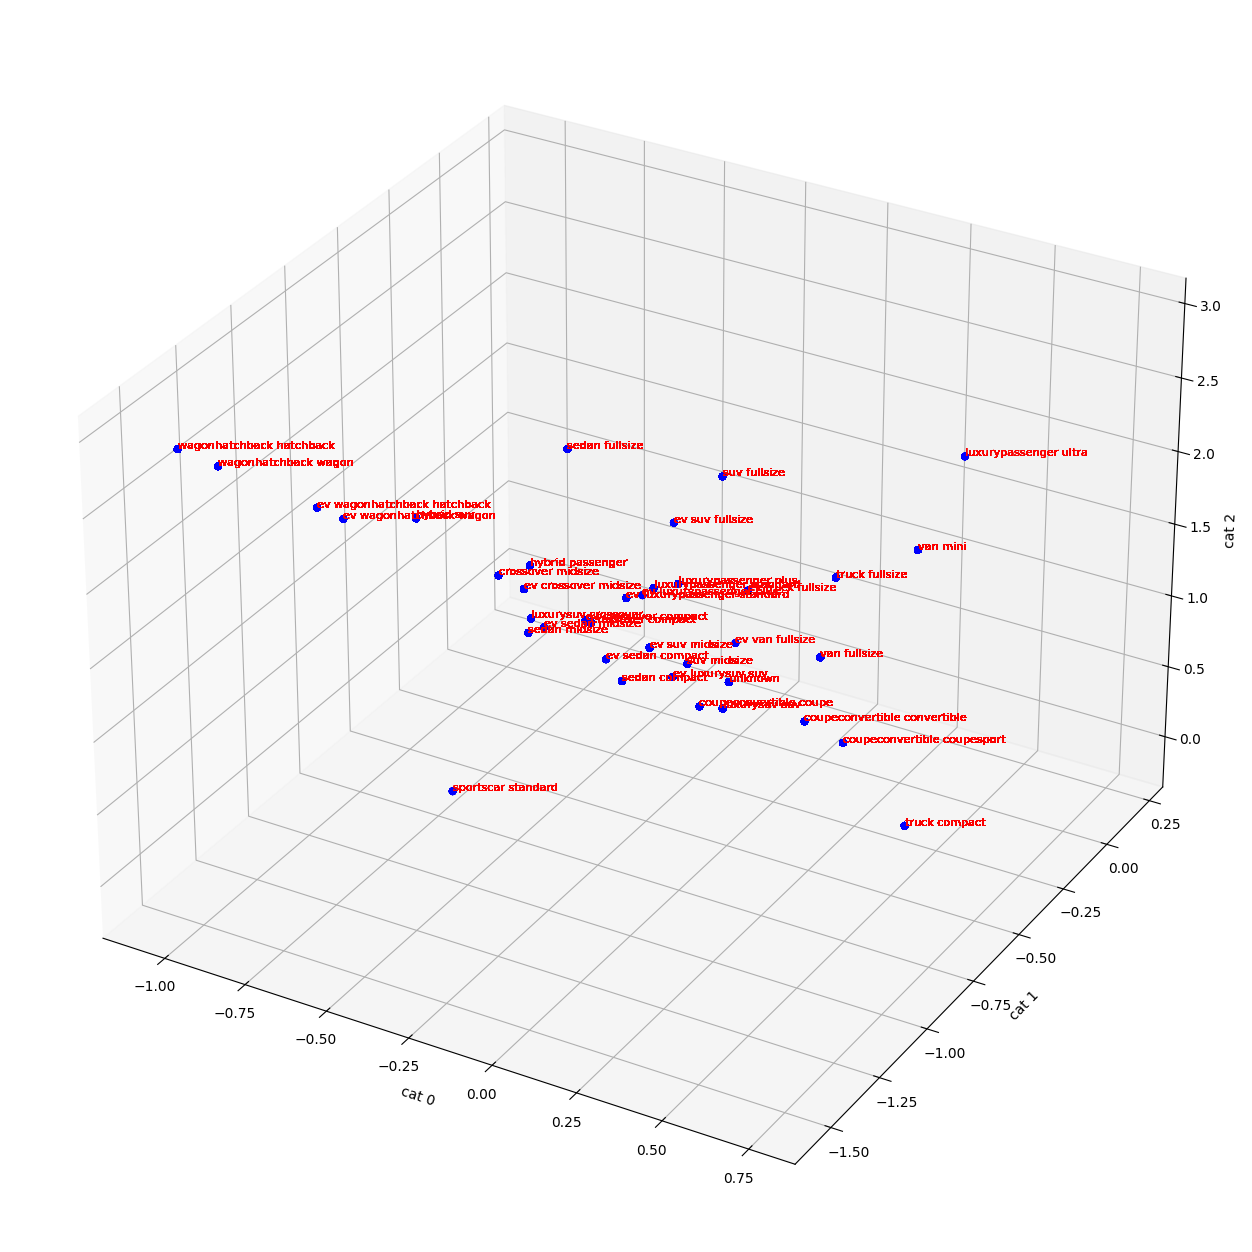

In [245]:
# Create a new figure
fig = plt.figure(figsize=(16, 16))

# Add an axes
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, color='b', marker='o')  # You can change the color and marker style

# Label each point
for i, txt in enumerate(labels):
    ax.text(x[i], y[i], z[i], txt, color='red', fontsize=8)  # You can change text color and properties

# Adding labels to the axes
ax.set_xlabel('cat 0')
ax.set_ylabel('cat 1')
ax.set_zlabel('cat 2')

# Show plot
plt.show()

In [246]:
# Remove cat column
cars_df.drop(columns='cat', inplace=True)
cars_df.shape

(51554, 114)

#### fuel_type
It seems like a close category, Nominal. Group them by category

In [247]:
cars_df['fuel_type'].value_counts(dropna=False)

fuel_type
Gasoline                         44748
Electric                          2436
Hybrid                            2289
Diesel                            1081
E85 Flex Fuel                      647
NaN                                295
Plug-In Hybrid                      15
Flexible Fuel                       13
Gasoline Fuel                       12
Bio Diesel                           5
Premium Unleaded                     4
Regular Unleaded                     4
Natural Gas                          2
Gas/Electric Hyb                     1
Hybrid Fuel                          1
Gasoline/Mild Electric Hybrid        1
Name: count, dtype: int64

In [248]:
def map_fuel_type(fuel_type):
    """
    Group by fuel types

    :param fuel_type: Car fuel type

    :return Fuel type category
    """
    if pd.isna(fuel_type):
        return np.nan

    match fuel_type:
        case 'Gasoline' | 'Gasoline Fuel' | 'Diesel' | 'Premium Unleaded' | 'Regular Unleaded' | 'Premium Unleaded':
            return 'Gasoline'
        case 'Electric' | 'Electric with Ga':
            return 'Electric'
        case 'Hybrid' | 'Plug-In Hybrid' | 'Plug-in Gas/Elec' | 'Gas/Electric Hyb' | 'Hybrid Fuel' | 'Bio Diesel' | 'Gasoline/Mild Electric Hybrid' | 'Natural Gas':
            return 'Hybrid'
        case 'Flexible Fuel' | 'E85 Flex Fuel'  | 'Flexible':
            return 'Flexible'
        case _:
            raise Exception(f"No expected drive train: {fuel_type}")
        

In [249]:
# Apply fuel type transformation
cars_df['fuel_type'] = cars_df['fuel_type'].map(map_fuel_type)

In [250]:
cars_df['fuel_type'].value_counts(dropna=False)

fuel_type
Gasoline    45849
Electric     2436
Hybrid       2314
Flexible      660
NaN           295
Name: count, dtype: int64

Apply one hot encoding. Remove the NaN values

In [251]:
cars_df = cars_df[~cars_df['fuel_type'].isna()]
cars_df.shape

(51259, 114)

In [252]:
# Initialize the OneHotEncoder drivetrain
fuel_type_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit and transform the data
fuel_type_encoded_data = fuel_type_encoder.fit_transform(cars_df[['fuel_type']])


In [253]:
# Convert the drivetrain encoded data into a DataFrame
fuel_type_encoded_df = pd.DataFrame(fuel_type_encoded_data, columns=fuel_type_encoder.get_feature_names_out(['fuel_type']), index=cars_df.index)
fuel_type_encoded_df

,fuel_type_Electric,fuel_type_Flexible,fuel_type_Gasoline,fuel_type_Hybrid
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
53407,0.0,0.0,1.0,0.0
53408,0.0,0.0,1.0,0.0
53409,0.0,0.0,1.0,0.0
53411,0.0,0.0,1.0,0.0


In [254]:
# Concatenate the original DataFrame with the drivetrain encoded DataFrame
cars_df = pd.concat([cars_df, fuel_type_encoded_df], axis=1)
cars_df

,msrp,year,price,mileage,fuel_type,stock_type,model_hashed_0,model_hashed_1,model_hashed_2,model_hashed_3,...,bodystyle_Sedan,bodystyle_Wagon,bodystyle_nan,cat_x0,cat_x1,cat_x2,fuel_type_Electric,fuel_type_Flexible,fuel_type_Gasoline,fuel_type_Hybrid
0,57215.0,2024,54595.0,0.0,Electric,New,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.753267,-0.299376,0.716584,1.0,0.0,0.0,0.0
1,58845.0,2024,52446.0,0.0,Gasoline,New,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.418023,-0.754630,1.549058,0.0,0.0,1.0,0.0
2,58795.0,2024,54295.0,8.0,Gasoline,New,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.418023,-0.754630,1.549058,0.0,0.0,1.0,0.0
3,27995.0,2024,24803.0,0.0,Gasoline,New,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.828698,-0.308240,0.774414,0.0,0.0,1.0,0.0
4,83630.0,2024,83630.0,20.0,Electric,New,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.753267,-0.299376,0.716584,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53407,NaN,2014,18973.0,134974.0,Gasoline,Used,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.152772,-0.449629,0.761670,0.0,0.0,1.0,0.0
53408,NaN,2021,58990.0,16009.0,Gasoline,Used,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.638427,-0.449684,0.758837,0.0,0.0,1.0,0.0
53409,32255.0,2024,31477.0,12.0,Gasoline,New,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,-0.656712,-0.434667,0.626677,0.0,0.0,1.0,0.0
53411,NaN,2010,19143.0,87601.0,Gasoline,Used,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.291986,-0.146394,-0.001170,0.0,0.0,1.0,0.0


In [255]:
# Once used drop the interior_color feature
cars_df.drop(columns='fuel_type', inplace=True)
cars_df.shape

(51259, 117)

#### stock_type
Not Transformation Needed

In [256]:
def map_stock_type(stock_type):
    """
    Map stock_type

    :param stock_type: stock type New/Used

    :return Binary stock_type 
    """
    if pd.isna(stock_type):
        return np.nan

    match stock_type:
        case 'New':
            return True
        case 'Used':
            return False
        case _:
            raise Exception(f"No expected stock type: {stock_type}")
        

In [257]:
# Apply binary transformation
cars_df['stock_type'] = cars_df['stock_type'].map(map_stock_type)

In [258]:
cars_df['stock_type'].value_counts()

stock_type
True     26679
False    24580
Name: count, dtype: int64

In [259]:
cars_df

,msrp,year,price,mileage,stock_type,model_hashed_0,model_hashed_1,model_hashed_2,model_hashed_3,model_hashed_4,...,bodystyle_Sedan,bodystyle_Wagon,bodystyle_nan,cat_x0,cat_x1,cat_x2,fuel_type_Electric,fuel_type_Flexible,fuel_type_Gasoline,fuel_type_Hybrid
0,57215.0,2024,54595.0,0.0,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.753267,-0.299376,0.716584,1.0,0.0,0.0,0.0
1,58845.0,2024,52446.0,0.0,True,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.418023,-0.754630,1.549058,0.0,0.0,1.0,0.0
2,58795.0,2024,54295.0,8.0,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.418023,-0.754630,1.549058,0.0,0.0,1.0,0.0
3,27995.0,2024,24803.0,0.0,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.828698,-0.308240,0.774414,0.0,0.0,1.0,0.0
4,83630.0,2024,83630.0,20.0,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.753267,-0.299376,0.716584,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53407,NaN,2014,18973.0,134974.0,False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.152772,-0.449629,0.761670,0.0,0.0,1.0,0.0
53408,NaN,2021,58990.0,16009.0,False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.638427,-0.449684,0.758837,0.0,0.0,1.0,0.0
53409,32255.0,2024,31477.0,12.0,True,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.656712,-0.434667,0.626677,0.0,0.0,1.0,0.0
53411,NaN,2010,19143.0,87601.0,False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.291986,-0.146394,-0.001170,0.0,0.0,1.0,0.0


#### Export Results 
Export the results

In [260]:
preprocess_filpath = '../data/data_exploration/output/cars_after_transform.csv'
cars_df.to_csv(preprocess_filpath, index=False)

### Data imputation
Imputate the data to populate missing values.

The extrategy to follow is use iterative imputation, but other impuration methods could be applied, it depends on the problem to solve 
* The column mean value. 
* The column median value.
* The column mode value.
* A constant value.
* KNN Imputation (Sensitive to outliers and different features scale).
* Iterative Imputation (in our case using the RandomForestRegressor estimator to handle outliers and different features scales).

In [261]:
# Iterative imputation must not use the target, remove it
cars_price = cars_df['price']
cars_df.drop(columns='price', inplace=True)

In [262]:
import joblib

# train/use Imputer
train_inputer = True

imputer_model_filepath = r'../data/data_exploration/output/preprocess_regression_imputer_model.pkl'
if train_inputer:
    # Train imputer
    imp = IterativeImputer(estimator=RandomForestRegressor(), verbose=1) 
    # fit on the dataset 
    imp.fit(cars_df) 
    # Save imnputer model
    joblib.dump(imp, imputer_model_filepath)

# Load your model
imp: IterativeImputer = joblib.load(imputer_model_filepath)
    
# Apply imputation
df_trans = imp.transform(cars_df)
# transform the dataset 
cars_df = pd.DataFrame(df_trans, columns=cars_df.columns, index=cars_df.index)
cars_df

[IterativeImputer] Completing matrix with shape (51259, 116)
[IterativeImputer] Change: 287343.1451182858, scaled tolerance: 962.839 


### Outliers Removal
Remove outliers to improve the data quality, the outliers are different of anomalies, keep this in mind.

Isolation Forest is used to remove the global outliers. Other outliers removal techniques are:
* Standard Derivation Method.
* Interquantile Range Method.
* Local Outlier Factor (local outlier removal).
* Isolation Forest.
* Others.

In [ ]:
isolation_forest_contamination = 0.1
iso_forest = IsolationForest(n_estimators=200, contamination=isolation_forest_contamination, random_state=42, verbose=1)
# Fit the model
iso_forest.fit(cars_df)
# Remove outliers 
cars_df['outlier'] = iso_forest.predict(cars_df)
# Remove global outliers
cars_df = cars_df[cars_df['outlier'] != -1]
# Remove the outlier column
cars_df.drop(columns='outlier', inplace=True)

C:\Users\cesar_0qb0xal\AppData\Local\Temp\ipykernel_12896\4286056245.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df.drop(columns='outlier', inplace=True)


### Feature Selection
Not needed in this case

### Scale Data
Not needed for now. Using Neural Networks we need to apply it (or any other ML algorithm with scale sensitivity)

### Dimensionality reduction
Not needed in this case

### Export Resutls
Not needed in this case

In [ ]:
cars_filepath = "../data/preprocess/cars_prepared.csv"
cars_df.to_csv(cars_filepath, index=False)